In [40]:
# import librerie
import os
import tweepy
import facebook
import requests
import datetime
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [65]:
# configuration file
config = {}
config_path = os.path.join(os.path.abspath('../../'))
config_name = 'config.py'
config_file = os.path.join(config_path,config_name)
exec(open(config_file).read(),config)
fb_app_id=config['FB_APP_ID']
fb_app_secret=config['FB_APP_SECRET']
fb_app_userid=config['FB_APP_USERID']

dir_out = os.path.join(os.path.abspath(''),'output')

In [12]:
# get access token
payload = {'grant_type': 'client_credentials', 'client_id': fb_app_id, 'client_secret': fb_app_secret}
response = requests.post('https://graph.facebook.com/oauth/access_token?', params = payload)
json_data = json.loads(response.text)
access_token = json_data['access_token']

In [13]:
# get graph Facebook
graph = facebook.GraphAPI(access_token=access_token, version='2.7')

In [31]:
# Candidati Elezioni
users = [
    {'user':'Renzi','user_id':'113335124914'},
    {'user':'Di Maio','user_id':'522391027797448'},
    {'user':'Salvini','user_id':'252306033154'},
    {'user':'Pisapia','user_id':'112352038802143'},
    {'user':'Meloni','user_id':'38919827644'},
    {'user':'Berlusconi','user_id':'116716651695782'}
]

In [32]:
# get today's date
todays_date = datetime.datetime.now().date()

In [33]:
# get fans
def get_fans(fb_user, fb_id, graph, date):
    info = graph.get_object(id=fb_id, fields='name,fan_count,posts')
    fan = info['fan_count']
    fan_d = {'dt_rif':todays_date,'user':fb_user,'fb_fans':fan}
    return fan_d

In [34]:
fb_fans = []
for user in users:
    fb_fans.append(get_fans(user['user'],user['user_id'],graph,todays_date))

In [35]:
df = pd.DataFrame(fb_fans)

In [36]:
df

,dt_rif,fb_fans,user
0,2017-11-02,1098380,Renzi
1,2017-11-02,1094242,Di Maio
2,2017-11-02,1934349,Salvini
3,2017-11-02,149885,Pisapia
4,2017-11-02,728827,Meloni
5,2017-11-02,985118,Berlusconi


In [37]:
# get database connection
db=config['DATABASE_ELE']
schema=config['SCHEMA_ELE']
engine = create_engine(db)

In [38]:
# write on db
#df.to_sql('fb_fans', engine, schema=schema, if_exists='append')

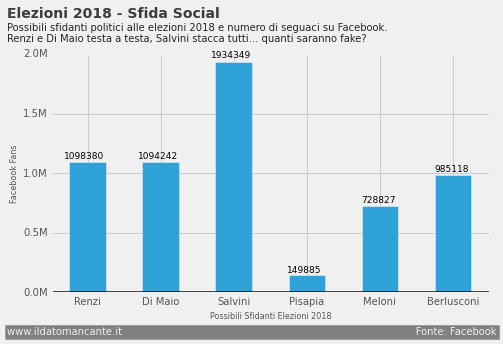

In [66]:
# grafico
#Grafico Fans #elezioni2018
style.use('fivethirtyeight')
tp = df.plot(
    kind='bar',
    legend = False,
    figsize = (7,4),
    x=df['user'])

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

tp.yaxis.set_major_formatter(formatter)

for p in tp.patches:
    tp.annotate(str(int(round(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.005), ha='center', va='center', xytext=(15, 5), textcoords='offset points',fontsize=9)
    tp.plot()
    
tp.tick_params(axis = 'both', which = 'major', labelsize = 10)
tp.set_xlabel('Possibili Sfidanti Elezioni 2018',fontsize=8)
tp.set_ylabel('Facebook Fans',fontsize=8)

tp.axhline(y = 0, color = 'black', linewidth = 4, alpha = 0.7)

plt.xticks(rotation=360)

text = tp.text(x = -1.1, y = -350000,
        s = 'www.ildatomancante.it                                                                                              Fonte: Facebook',
        fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

text.set_url('http://www.ildatomancante.it')

# Adding a title and a subtitle Reddito e aspettativa di vita
tp.text(x = -1.1, y = 2300000, s = "Elezioni 2018 - Sfida Social",
                   fontsize = 14, weight = 'bold', alpha = .75)
tp.text(x = -1.1, y = 2100000, 
                   s = "Possibili sfidanti politici alle elezioni 2018 e numero di seguaci su Facebook.\nRenzi e Di Maio testa a testa, Salvini stacca tutti... quanti saranno fake?",
                  fontsize = 10, alpha = .85)

fig_posts = tp.get_figure()
fig_posts.savefig(os.path.join(dir_out,'FB_Fans.png'), format='png', dpi=300,bbox_inches='tight')
fig_posts.savefig(os.path.join(dir_out,'FB_Fans.svg'), format='svg', dpi=300,bbox_inches='tight')